In [113]:
using DelimitedFiles, Statistics, LsqFit, Plots
plotlyjs()

WebIO._IJuliaInit()

Plots.PlotlyJSBackend()

In [2]:
A = readdlm("hi.dat")

2485×2 Matrix{Any}:
  "Distance_(cm)"    "Gray_Value"
 0.0               11.9249
 0.00223           12.6351
 0.00446           13.8093
 0.00669           14.7838
 0.00892           15.9024
 0.01115           16.5045
 0.01338           16.988
 0.01561           17.1622
 0.01784           17.4144
 0.02007           17.4685
 0.0223            17.7207
 0.02453           17.6697
 ⋮                 
 5.51324           26.8919
 5.51547           26.5916
 5.5177            26.3168
 5.51993           26.3288
 5.52216           26.3514
 5.52439           26.3498
 5.52662           26.0886
 5.52885           25.6396
 5.53108           25.036
 5.53331           24.6141
 5.53554           24.4054
 5.53777           24.2658

In [3]:
x = A[2:end,1]
y = A[2:end,2];

In [85]:
x =x[93:end-120]
y = y[93:end-120];

In [131]:
# Fringe function
fringe(x, A,B,C,D) = @. A*(1/(1+B*sin((x-C)/D)^2))

# Gaussian background
gaussian(L, A, mu, sigm) =@. A * exp(-(L - mu)^2/(2*(sigm)^2))

# Total fitting function
model(L, p) = fringe(L, p[1], p[2], p[3], p[4]) .+
              gaussian(L, p[5], p[6], p[7]) .+
              p[8]
p0 = [
    60.0, 
    8.2,
    3.1,
    0.2,
    4.0,
    0.28,
    16.0/sqrt(2),
    26.0
    ]
fit = curve_fit(model, x,y, p0)
fit.param

8-element Vector{Float64}:
    269.69180312750063
      0.16920451406121637
      2.897178496852328
      0.1756575445245653
 -25399.93962361603
  65397.16146612277
  25846.8709271988
    854.1475102205126

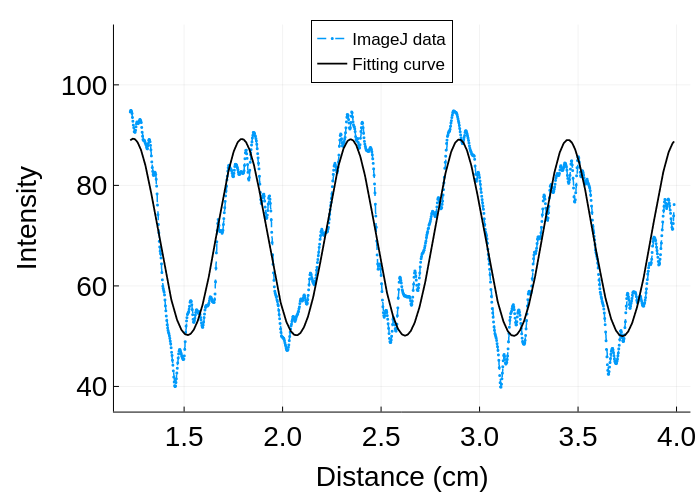

In [132]:
plot(x,y, label="ImageJ data", lw=1.5, ls=:dash, marker=:circle, ms=1.5, msw=0.0, guidefontsize=20, tickfontsize=20, legendfontsize=12)
plot!(x, model(x, fit.param), label="Fitting curve", c=:black, lw=1.8, legend=:top)
#plot!(x, model(x,p0))
xlabel!("Distance (cm)")
ylabel!("Intensity")
ylims!(35,112)

In [133]:
savefig("finness_fitting.pdf")

"/home/shaggy1304/IISER/IISER_Courses/PH4201/expt02/finness_fitting.pdf"

In [39]:
mean(y)
ind = findall(k->abs.(k .-mean(y))<0.01, y)

1-element Vector{Int64}:
 49

In [41]:
std(y)

15.441585419659296

In [147]:
r = (1.42/6.65)

0.21353383458646613

In [148]:
f = pi*sqrt(r)/(1-r)

1.8458787860803723

In [149]:
(0.59*pi^2/4)^0.5

1.2065515526328248

In [ ]:
0.17